# EDA - The Movies Dataset 

raw dataset source : https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

# Team Members

- 6610402230 ศิริสุข ทานธรรม หมู่ 1
- 66 ซัน หมู่ 1
- 66 ตี้ หมู่ 1

# EDA - 6610402230 ศิริสุข ทานธรรม

## 1. Import Library

In [72]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## 2. ดูข้อมูลตาราง

In [73]:
path = Path('./')
df_meta = pd.read_csv(path / 'movie_meta.csv')
df_meta.set_index('id',inplace=True)
df_meta

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"['Adventure', 'Fantasy', 'Family']",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"['Comedy', 'Drama', 'Romance']",16000000.0,81452156.0,6.1,34.0
949,heat,"['Action', 'Crime', 'Drama', 'Thriller']",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"['Action', 'Adventure', 'Thriller']",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"['Action', 'Comedy', 'Drama']",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"['Crime', 'Comedy']",750000.0,3.0,6.0,4.0
62757,dikari,"['Comedy', 'Drama']",800000.0,1328612.0,5.8,6.0


## 3. แสดง genres 

In [74]:
df_meta.genres = df_meta.genres.apply(eval)
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
        'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
        'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
        'Music', 'TV Movie', 'Foreign'], dtype=object),
 (20,))

## 4. visualize graph ข้อมูลเบื้องต้น

In [75]:
def plot_avg_budget_revenue(df):
    df_exploded = df.explode('genres')
    
    genre_stats = df_exploded.groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x - width/2, genre_stats['budget'], width, label='Budget', color='skyblue')
    plt.bar(x + width/2, genre_stats['revenue'], width, label='Revenue', color='lightgreen')

    plt.xlabel('Genres')
    plt.ylabel('Amount ($)')
    plt.title('Average Budget vs Revenue by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')
    plt.legend()

    # Format y-axis to millions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}M' if x >= 1e6 else f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()


In [76]:
def plot_avg_vote_by_genre(x):
    df_exploded = x.explode('genres')

    genre_stats = df_exploded.groupby('genres').agg({
        'vote_average': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x, genre_stats['vote_average'], width, color='skyblue')

    plt.xlabel('Genres')
    plt.ylabel('Average Vote Rating')
    plt.title('Average Vote Rating by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')

    for i, v in enumerate(genre_stats['vote_average']):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

### 4.1 ผลลัพธ์
- แสดงผล กราฟ budget, revenue ของแต่ละ genre
- แสดงผล กราฟ average vote (rating)ของแต่ละ genre

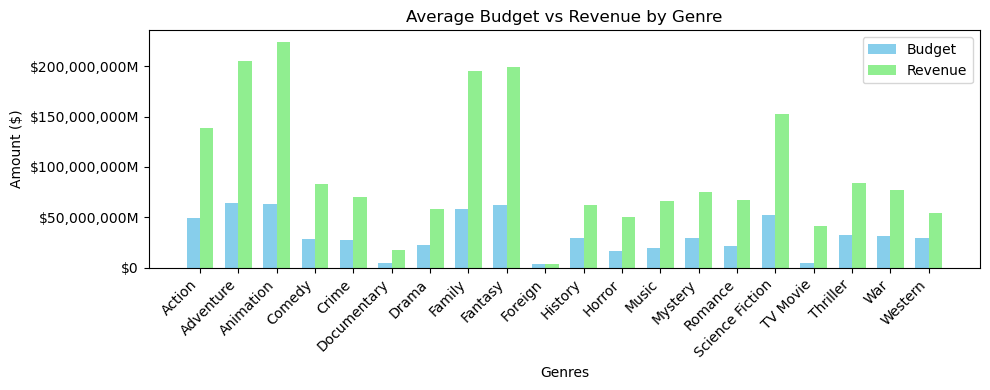

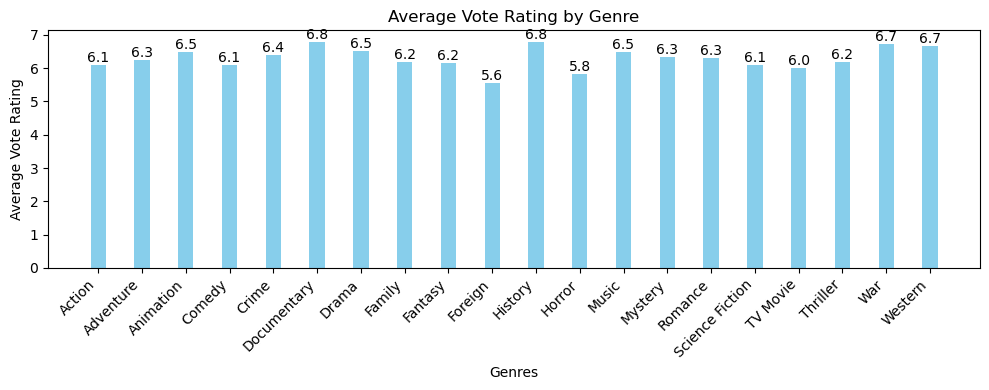

In [77]:
plot_avg_budget_revenue(df_meta)
plot_avg_vote_by_genre(df_meta)

### 4.2 การหาค่ากลาง

In [78]:
mean_revenue = df_meta['revenue'].mean()
mean_budget = df_meta['budget'].mean()
mean_vote = df_meta['vote_average'].mean()

print(f"Average Revenue: ${mean_revenue:,.2f}")
print(f"Average Budget:  ${mean_budget:,.2f}")
print(f"Average Vote:    {mean_vote:.2f}")

Average Revenue: $90,645,073.73
Average Budget:  $31,192,402.89
Average Vote:    6.28


## 5. แสดงกราฟ distribution

### 5.1 revenue distribution

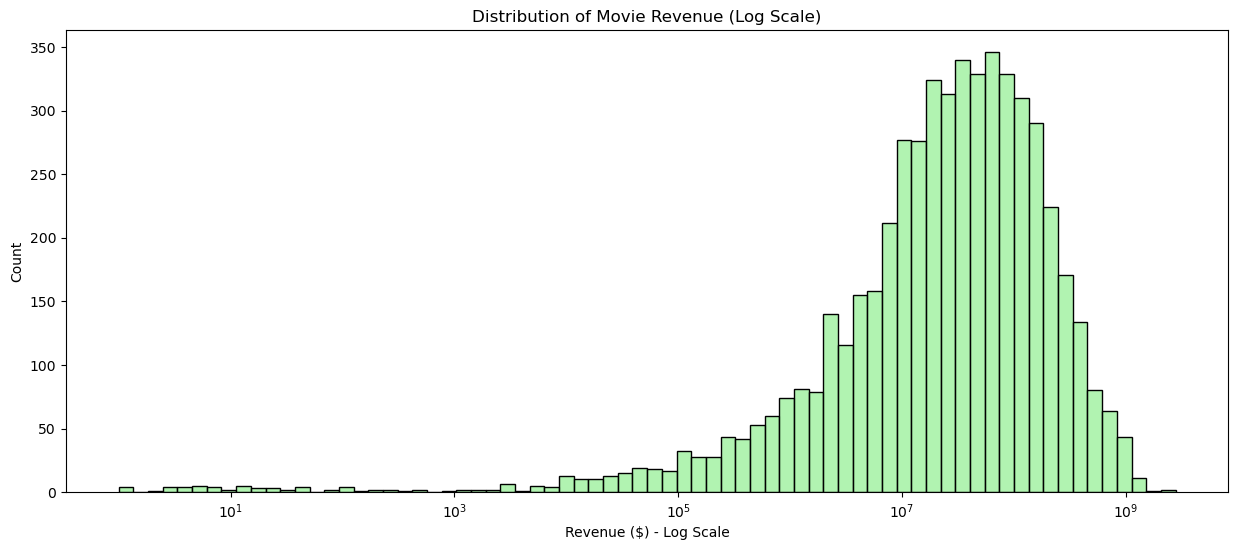

In [79]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_meta, x='revenue', log_scale=True, color='lightgreen', alpha=0.7)
plt.title('Distribution of Movie Revenue (Log Scale)')
plt.xlabel('Revenue ($) - Log Scale')
plt.ylabel('Count')
plt.show()


### 5.2 budget distribution

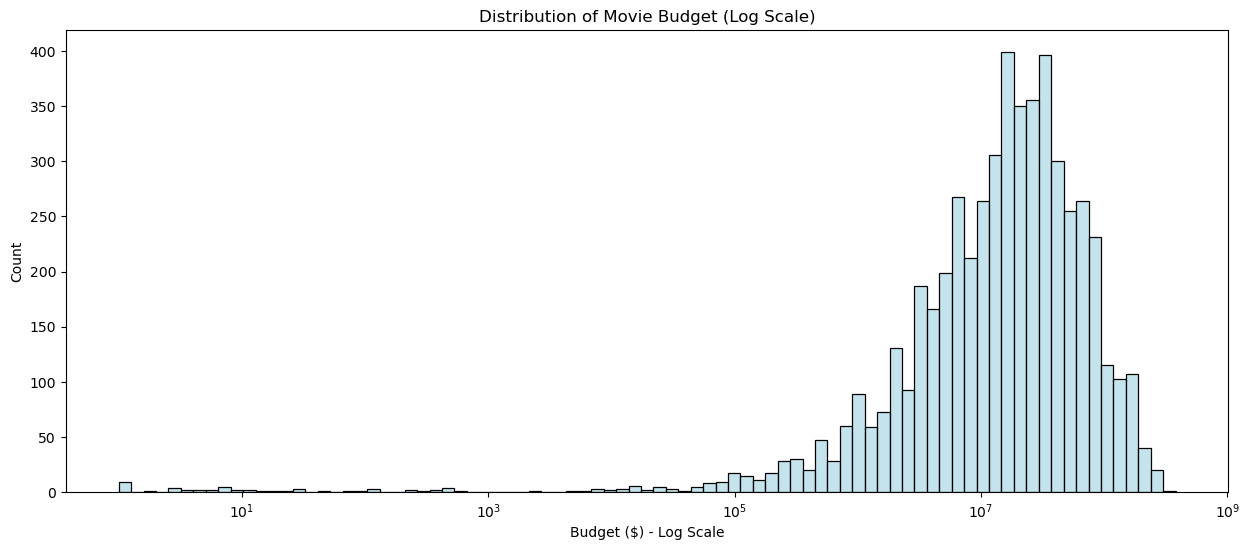

In [80]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_meta, x='budget', log_scale=True, color='lightblue', alpha=0.7)
plt.title('Distribution of Movie Budget (Log Scale)')
plt.xlabel('Budget ($) - Log Scale')
plt.ylabel('Count')
plt.show()


### 5.1 vote_average(rating) distribution

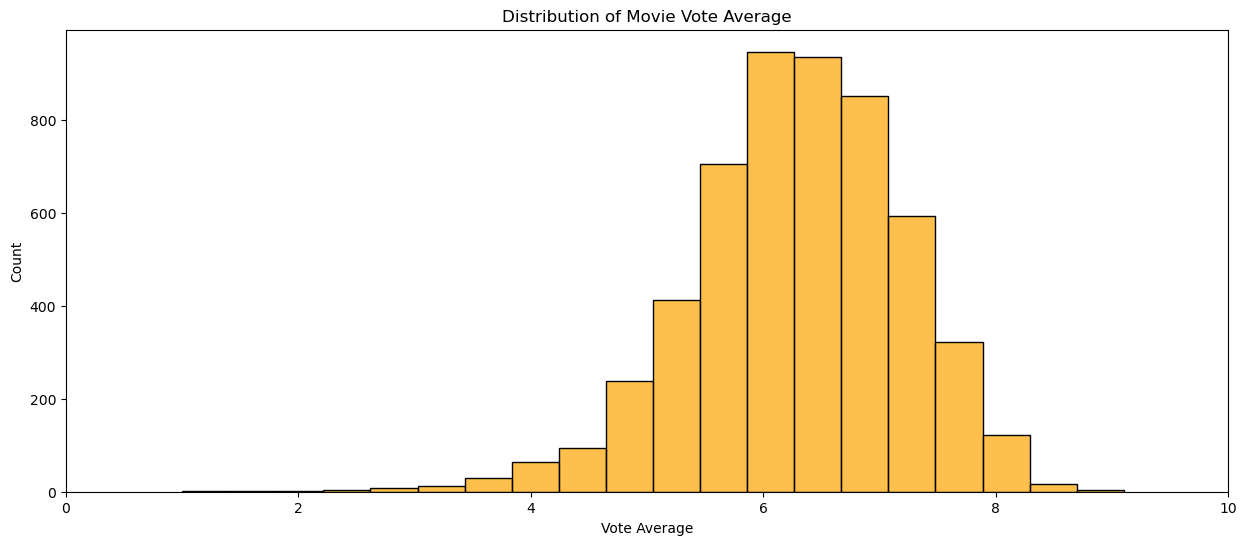

In [81]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df_meta['vote_average'],bins=20,color='orange',alpha=0.7)
plt.xlim(0, 10)  
plt.title('Distribution of Movie Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

## 6.Central Limit Theorem Visualization

### 6.1 sample with n_bootstraps

In [82]:
n_bootstraps = 1000  
sample_size = 500    
budget_means = []
revenue_means = []
vote_averages_means = []

for i in range(n_bootstraps):
    sample = df_meta.sample(n=sample_size, replace=True)
    sample_means_budget = sample.explode('genres').groupby('genres')['budget'].mean()
    sample_means_revenue = sample.explode('genres').groupby('genres')['revenue'].mean()
    sample_means_vote_avg = sample.explode('genres').groupby('genres')['vote_average'].mean()
    budget_means.append(sample_means_budget)
    revenue_means.append(sample_means_revenue)
    vote_averages_means.append(sample_means_vote_avg)

budget_means_df = pd.DataFrame(budget_means)
revenue_means_df = pd.DataFrame(revenue_means)
vote_averages_means_df = pd.DataFrame(vote_averages_means)

### 6.2 fill zero values

In [83]:
budget_means_df.fillna(0,inplace=True)
revenue_means_df.fillna(0,inplace=True)
vote_averages_means_df.fillna(0,inplace=True)

In [84]:
def plot_samples_genre_mean(df_meta,budget_means_df, revenue_means_df):
    n_genres = len(budget_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 10
    
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    })
    
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(budget_means_df.columns[start_idx:end_idx]):
            # Budget histogram
            axes[idx].hist(budget_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='skyblue', label='Sample Budget Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'budget'], color='blue', linestyle='--', label='Actual Budget Mean')
            # Revenue histogram
            axes[idx].hist(revenue_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightgreen', label='Sample Revenue Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'revenue'], color='green', linestyle='--', label='Actual Revenue Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Budget=${budget_means_df[genre].mean():,.0f}\n'
                               f'Sample Mean Revenue=${revenue_means_df[genre].mean():,.0f}\n'
                               f'Actual Mean Budget=${actual_means.loc[genre,"budget"]:,.0f}\n'
                               f'Actual Mean Revenue=${actual_means.loc[genre,"revenue"]:,.0f}')
            axes[idx].set_xlabel('Amount ($)')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
 

In [85]:
def plot_samples_genre_mean_vote(df_meta, vote_averages_means_df):
    n_genres = len(vote_averages_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'vote_average': 'mean'
    })
    
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(vote_averages_means_df.columns[start_idx:end_idx]):
            # Vote average histogram
            axes[idx].hist(vote_averages_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightpink', label='Sample Vote Average Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'vote_average'], color='red', linestyle='--', label='Actual Vote Average Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Vote={vote_averages_means_df[genre].mean():.1f}\n'
                               f'Actual Mean Vote={actual_means.loc[genre,"vote_average"]:.1f}')
            axes[idx].set_xlabel('Vote Score')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()

### 6.3 plot mean ของ sample budget revenue และ vote จาก sample กับค่าจริง

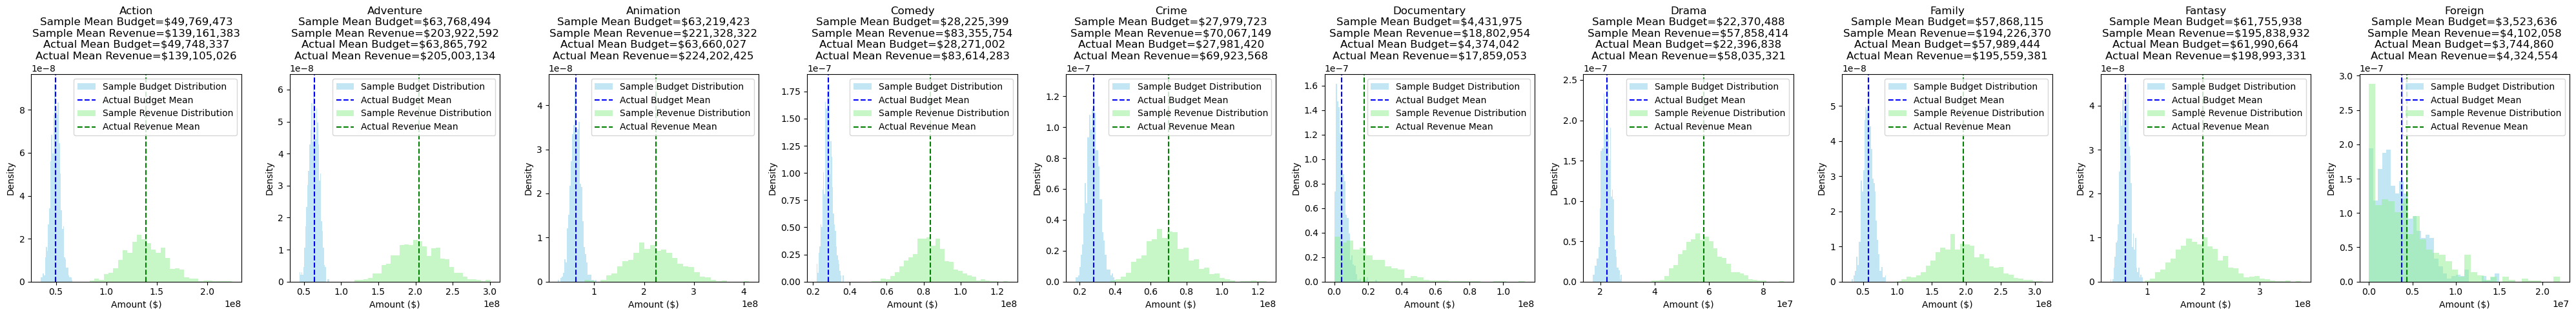

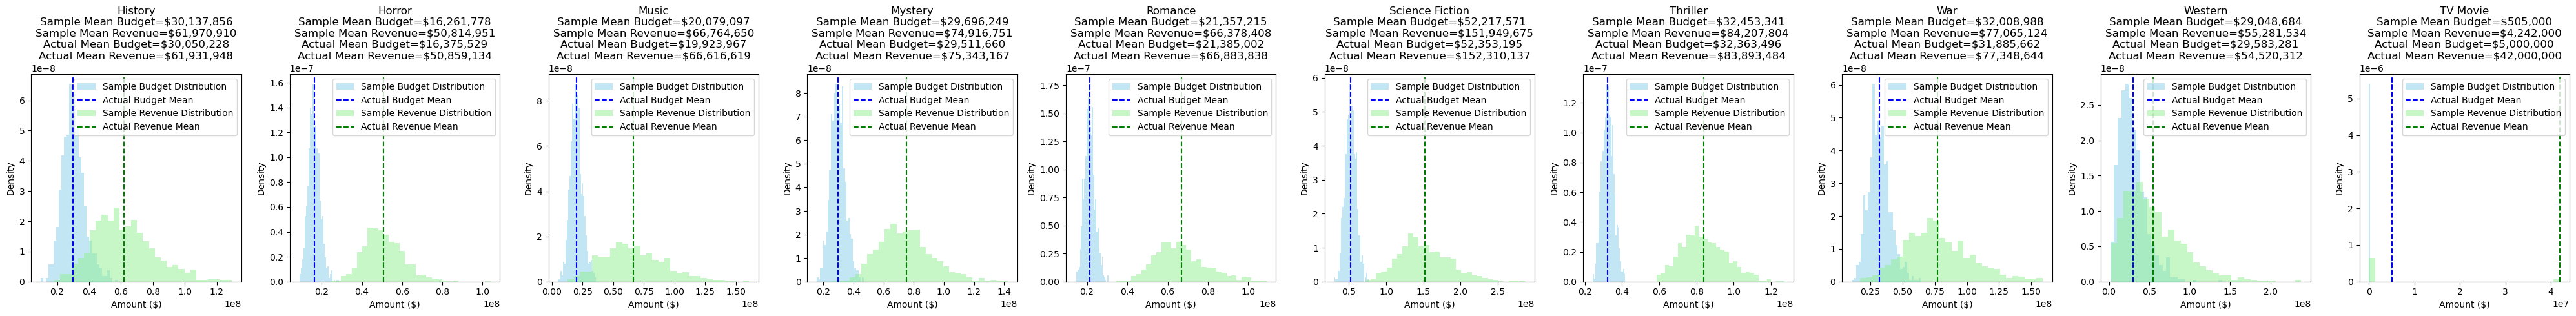

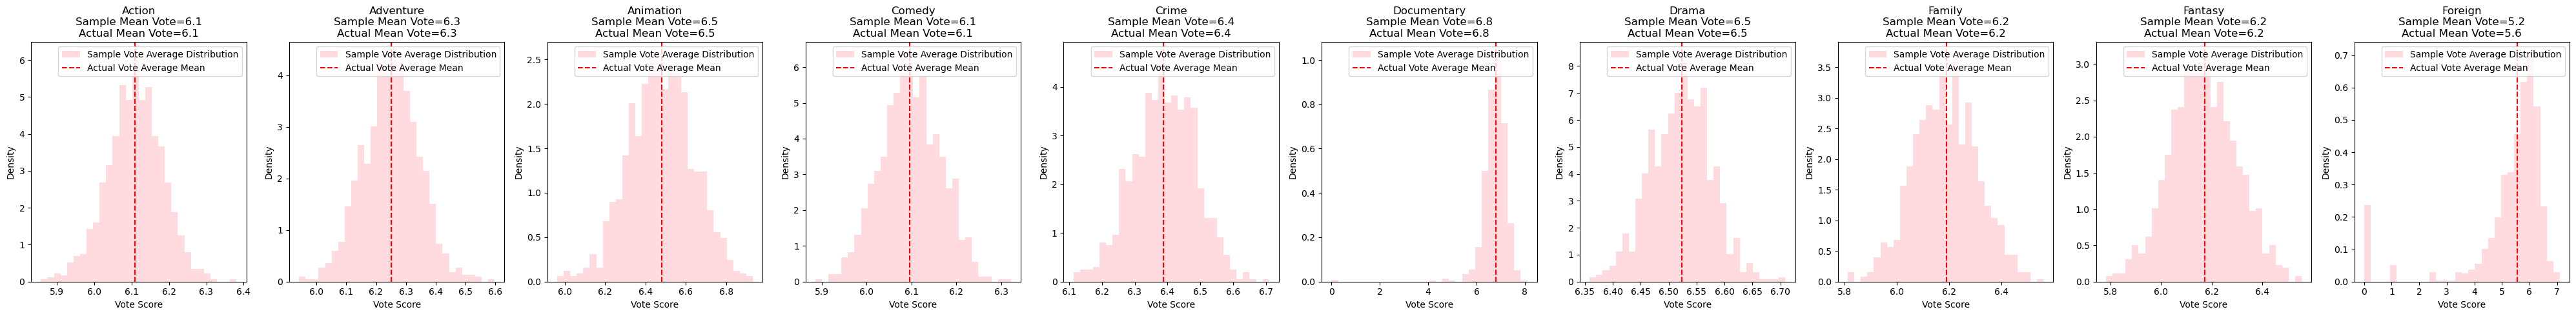

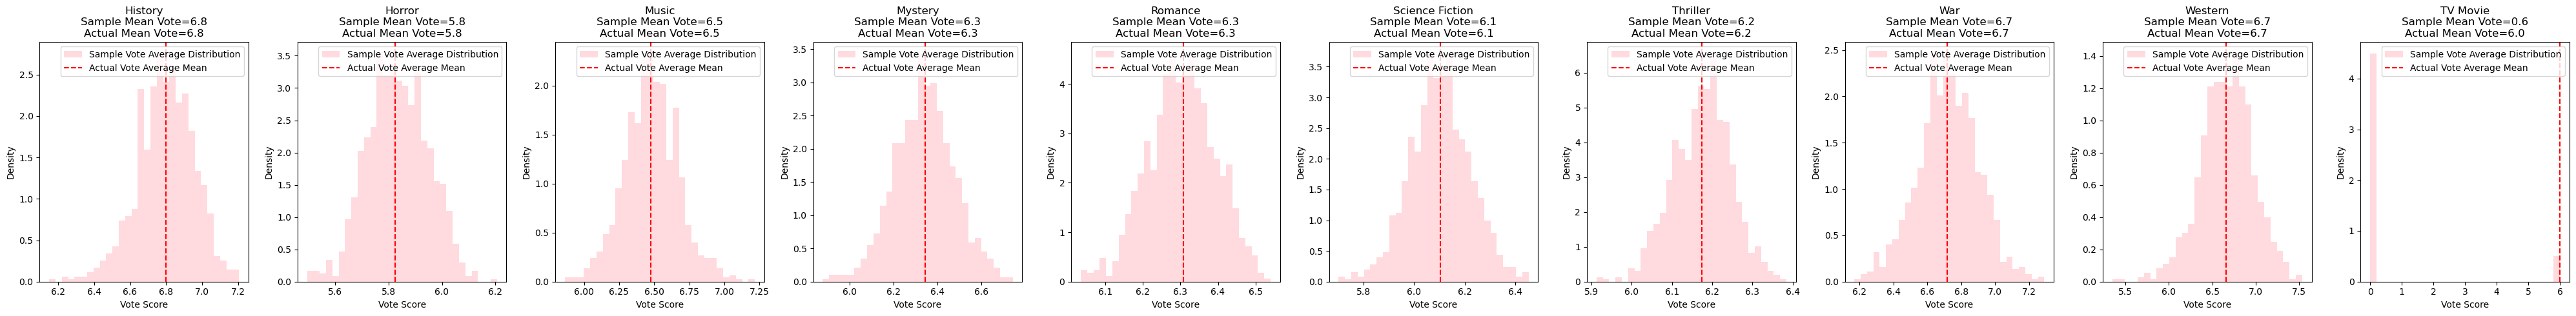

In [86]:
plot_samples_genre_mean(df_meta,budget_means_df,revenue_means_df)
plot_samples_genre_mean_vote(df_meta, vote_averages_means_df)

## 7. การหา correlation ของข้อมูล

### 7.1 ฮยากรู้ว่าข้อมูลต่อไปนี้มีความสัมพันธ์กันมั้ย
- budget
- revenue
- vote_average(rating)


In [87]:

from scipy import stats

cols = ['budget', 'revenue', 'vote_average']
df_sub = df_meta[cols]

corr_matrix = df_sub.corr()
print("Correlation matrix:")
print(corr_matrix)

# To Calculate Pearson and p-value for each pair of variable
print("\nDetailed correlation analysis with p-values:")
for i, col1 in enumerate(cols):
    for col2 in cols[i+1:]:
        r, p = stats.pearsonr(df_sub[col1], df_sub[col2])
        print(f"{col1} vs {col2}: r = {r:.2f}, p-value = {p:.3g}")

Correlation matrix:
                budget   revenue  vote_average
budget        1.000000  0.730104     -0.011925
revenue       0.730104  1.000000      0.167952
vote_average -0.011925  0.167952      1.000000

Detailed correlation analysis with p-values:
budget vs revenue: r = 0.73, p-value = 0
budget vs vote_average: r = -0.01, p-value = 0.383
revenue vs vote_average: r = 0.17, p-value = 3.4e-35


### 7.2 revenue confidence interval ของ dataset

In [88]:
# Standard Error s/n**1/2
SE = df_sub.revenue.std() / len(df_sub.revenue)**(1/2)

# Confidence Interval (95%)
confidence_level = 0.95
degrees_of_freedom = len(df_sub.revenue) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

margin_of_error = t_value * SE # 1.96 * Standard Error
print(f"t-value: {t_value:.2f}, SE: {SE:.2f}, Margin of Error: {margin_of_error:.2f}")
confidence_interval = (df_sub.revenue.mean() - margin_of_error, 
                      df_sub.revenue.mean() + margin_of_error)

print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

t-value: 1.96, SE: 2273456.74, Margin of Error: 4456900.33
95% Confidence Interval: (86188173.40, 95101974.05)


### 7.3 การหา correlation ของแต่ละ genre

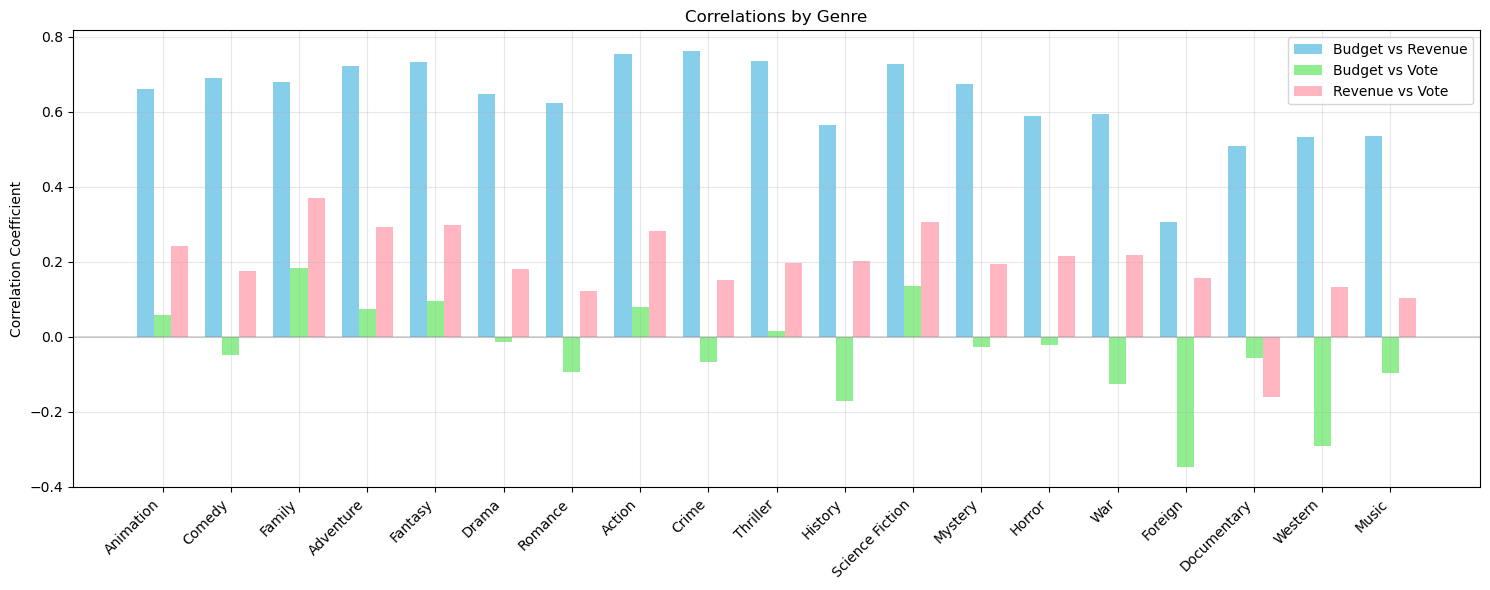

In [89]:
df_exploded = df_meta.explode('genres')
genres = df_exploded['genres'].unique()

budget_revenue_corr = []
budget_vote_corr = []
revenue_vote_corr = []
genre_names = []

for genre in genres:
    genre_data = df_exploded[df_exploded['genres'] == genre][['budget', 'revenue', 'vote_average']]
    
    if len(genre_data) > 2:
        corr_matrix = genre_data.corr()
        budget_revenue_corr.append(corr_matrix.loc['budget', 'revenue'])
        budget_vote_corr.append(corr_matrix.loc['budget', 'vote_average'])
        revenue_vote_corr.append(corr_matrix.loc['revenue', 'vote_average'])
        genre_names.append(genre)

fig, ax = plt.subplots(figsize=(15, 6))

width = 0.25
x = np.arange(len(genre_names))

ax.bar(x - width, budget_revenue_corr, width, label='Budget vs Revenue', color='skyblue')
ax.bar(x, budget_vote_corr, width, label='Budget vs Vote', color='lightgreen')
ax.bar(x + width, revenue_vote_corr, width, label='Revenue vs Vote', color='lightpink')

ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlations by Genre')
ax.set_xticks(x)
ax.set_xticklabels(genre_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Add horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

## 8.การทำ Hypothesis Testing

### 8.1 ประเด็นคำถาม
- คำถาม (สมมุติฐาน) คือ vote_average และ budget ที่เพิ่มขึ้นมีผลทำให้ revenue สูงขึ้น
- H0 เป็นความบังเอิญ
- H1 เป็นความจริง
- alpha = 0.0001

In [90]:
import statsmodels.api as sm
df_sub = df_sub[(df_sub['budget'] > 0) & (df_sub['revenue'] > 0)]

# log-scale reduce skew of data
df_sub['log_budget'] = np.log(df_sub['budget'])
df_sub['log_revenue'] = np.log(df_sub['revenue'])

X = df_sub[['log_budget', 'vote_average']]  # indepentdent variable
X = sm.add_constant(X)  # add constant
y = df_sub['log_revenue'] # dependent variable
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2974.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:08:33   Log-Likelihood:                -10716.
No. Observations:                5358   AIC:                         2.144e+04
Df Residuals:                    5355   BIC:                         2.146e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0717      0.265     -4.038   

* Prob (F-statistic): 0.00 
   - P-Value extremely small (< 0.000001)
* coefficent of log_budget: 0.8905  
* coefficent of vote_average 0.5308 

### 8.2 วิเคราะห์ผล hypothesis testing

NOTE : log-scale ช่วยในการตีความสัมประสิทธิ์เป็นแบบเปลี่ยนแปลงในอัตราส่วนหรือเปอร์เซ็นต์ ซึ่งเป็นวิธีที่นิยมใช้เมื่อข้อมูลมีการกระจายที่เอียง (skewed) และมีค่า outliers สูงขึ้นในบางกรณี


* จากผลการทดสอบสมมุติญาน P-Value < < 0.000001 น้อยกว่า alpha 0.0001 บอกได้ว่า 
  - reject H0
  - accept H1
  - ยอมรอบสมมุติฐานที่ว่า budget และ vote_average เพิ่มขึ้นทำให้ค่า revene เพิ่มขึ้น


* จากผล coefficent of log_budget: 0.8905  
  - เมื่อ log_budget เพิ่มขึ้นหนึ่งหน่วยทำให้ค่า revenue เพิ่มขึ้น 0.8905  
* จากผล coefficent of vote_average: 0.5308   
  - เมื่อ vote_average เพิ่มขึ้นหนึ่งหน่วยทำให้ค่า revenue เพิ่มขึ้น 0.5308  

## สรุปผล Insight

จากการวิเคราห์ correlation จากข้อมูล budget vote_average revenue พบว่า budget และ vote_average มีความสัมพันธืเป็นเส้นตรงไปทางบวกกับข้อมูล revenue โดยเฉพาะจากการ วิเคราะห์เจาะลึกไปที่ genre ทำให้ทราบว่ามี correlation ที่สูงกว่าในระดับข้อมูลรวม และจากการทำ hypothesis testing ยอมรอบสมมุติฐานที่ว่า budget vote_average มีผลกับกับ revenue ไปทางบวกเพราะ P-Value น้อยกว่าค่า alpha และมีค่าการเปลี่ยนแปลงที่ budget หรือ vote_average เพิ่มขึ้น 1 หน่วยทำให้ revenue เพิ่มขึ้น 0.8905 และ 0.5308 ตามลำดับ